In [1]:
library(ReactomePA)
library(openxlsx)


Registered S3 method overwritten by 'enrichplot':
  method               from
  fortify.enrichResult DOSE
ReactomePA v1.28.0  For help: https://guangchuangyu.github.io/ReactomePA

If you use ReactomePA in published research, please cite:
Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for reactome pathway analysis and visualization. Molecular BioSystems 2016, 12(2):477-479


In [2]:
metadata = read.xlsx("/home/hsher/c2c_input/pellin_lin_metadata_1211.xlsx")
metadata$Louvain_annotation

[1] "CMP"                               "Erythro-Branch2(FAM178B, MT high)"
 [3] "Erythro-Early"                     "MEP(late)"                        
 [5] "Erythro-Early"                     "GMP(MPO+ELANE+)"                  
 [7] "Erythro-late"                      "Ly(DNTT+)"                        
 [9] "HSPC"                              "GMP(MPO+)"                        
[11] "Erythro-Branch2-(FAM178B MT high)" "Erythro-Middle"                   
[13] "GMP(MPO+ELANE+)"                   "GMP(MPO+ELANE+)"                  
[15] "Meg(PLEK+)"                        "GMP(MPO+IRF8+)"                   
[17] "GMP(MPO+ELANE+)"                   "BEMP/Basophil(CLC+)"              
[19] "Erythro-Late"                      "GMP(MPO+)"                        
[21] "GMP(MPO+ELANE+)"

In [3]:
parse_genelist <- function(filename, metadata){
    # read file
    conn <- file(filename,open="r")
    file_lines <- readLines(conn)
    close(conn)
    
    # parse file
    gene_list = sapply(file_lines, strsplit, split = ',')
    
    # metdata file
    
    names(gene_list) <- metadata$Louvain_annotation
    
    
    return(gene_list)
}

In [4]:
cell16_75_L = parse_genelist('cell16_symbol1.txt', metadata)
cell16_90_L = parse_genelist('cell16_symbol1_90.txt', metadata)
cell16_75_R = parse_genelist('cell16_symbol2.txt', metadata)
cell16_90_R = parse_genelist('cell16_symbol2_90.txt', metadata)

In [6]:
require(clusterProfiler)
res <- compareCluster(cell16_75_L, fun="enrichPathway")


Loading required package: clusterProfiler
clusterProfiler v3.12.0  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.


ERROR: Error in `levels<-`(`*tmp*`, value = as.character(levels)): factor level [5] is duplicated


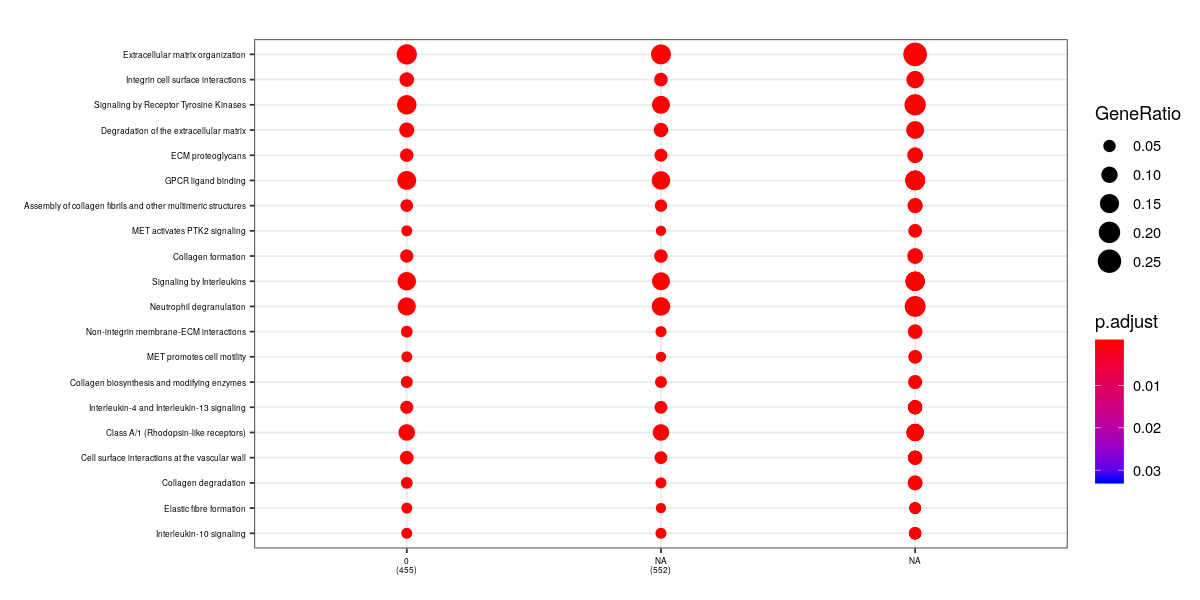

In [9]:
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=5, repr.plot.height=5)
dotplot(res, showCategory = 20, font.size = 8)

In [7]:
res <- compareCluster(cell16_75_R, fun="enrichPathway")
options(repr.plot.width=5, repr.plot.height=5)
dotplot(res, showCategory = 20, font.size = 8)

ERROR: Error in `levels<-`(`*tmp*`, value = as.character(levels)): factor level [5] is duplicated
